In [5]:
import emoji
import re
import pandas as pd

# Load the tweets data into a DataFrame
tweets_file_path = 'tweets1.csv'  # Update this path to your actual file
tweets_df = pd.read_csv(tweets_file_path)

# Update cleaning function to remove emojis more effectively
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')  # Remove all emojis

def clean_tweet_text_improved(text):
    text = remove_emojis(text)  # Remove emojis
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation and symbols
    return text.strip()

# Apply improved cleaning function to the 'Tweet' column
tweets_df['Cleaned Tweet'] = tweets_df['Tweet'].apply(clean_tweet_text_improved)

# Save the newly cleaned data to a file
cleaned_file_path_improved = 'cleaned_tweets_no_emojis.tsv'
tweets_df.to_csv(cleaned_file_path_improved, sep='\t', index=False, encoding='utf-8')

cleaned_file_path_improved


'cleaned_tweets_no_emojis.tsv'

In [6]:
%pip install textblob
from textblob import TextBlob


# Function to get the sentiment of a tweet
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the 'Cleaned Tweet' column
tweets_df['Sentiment'] = tweets_df['Cleaned Tweet'].apply(get_sentiment)

# Display the DataFrame with the new Sentiment column
print(tweets_df[['Cleaned Tweet', 'Sentiment']])


  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
                                        Cleaned Tweet  Sentiment
0   RT  Happy Birthday to Sir Alex Ferguson who tu...   0.800000
1   RT  Congrats to Argentina and to the GOAT Lion...   0.600000
2   Happy 83rd Birthday to the Legendary Sir Alex ...   0.493333
3   RT  Anyone who can answer these 3 questions co...   0.800000
4   RT  Happy birthday to the one and only Sir Ale...   0.400000
..                                                ...        ...
95  RT  Happy Birthday to Sir Alex Ferguson who tu...   0.800000
96  RT  Happy birthday to the one and only Sir Ale...   0.400000
97  RT  Anyone who can answer these 3 questions co...   0.800000
98  RT   T20I World Cup winner\n Gold Medal in Asi...   0.250000
99  RT  Happy birthday to the GREATEST MANAGER of ...   0.900000

[100 rows x 2 columns]


In [7]:
# Function to categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function to the 'Sentiment' column
tweets_df['Sentiment Category'] = tweets_df['Sentiment'].apply(categorize_sentiment)

# Display the DataFrame with the new Sentiment Category column
print(tweets_df[['Cleaned Tweet', 'Sentiment', 'Sentiment Category']])

                                        Cleaned Tweet  Sentiment  \
0   RT  Happy Birthday to Sir Alex Ferguson who tu...   0.800000   
1   RT  Congrats to Argentina and to the GOAT Lion...   0.600000   
2   Happy 83rd Birthday to the Legendary Sir Alex ...   0.493333   
3   RT  Anyone who can answer these 3 questions co...   0.800000   
4   RT  Happy birthday to the one and only Sir Ale...   0.400000   
..                                                ...        ...   
95  RT  Happy Birthday to Sir Alex Ferguson who tu...   0.800000   
96  RT  Happy birthday to the one and only Sir Ale...   0.400000   
97  RT  Anyone who can answer these 3 questions co...   0.800000   
98  RT   T20I World Cup winner\n Gold Medal in Asi...   0.250000   
99  RT  Happy birthday to the GREATEST MANAGER of ...   0.900000   

   Sentiment Category  
0            Positive  
1            Positive  
2            Positive  
3            Positive  
4            Positive  
..                ...  
95           Po

In [8]:
# Show the number of tweets in each sentiment category
sentiment_counts = tweets_df['Sentiment Category'].value_counts()
print(sentiment_counts)

Sentiment Category
Positive    92
Neutral      7
Negative     1
Name: count, dtype: int64


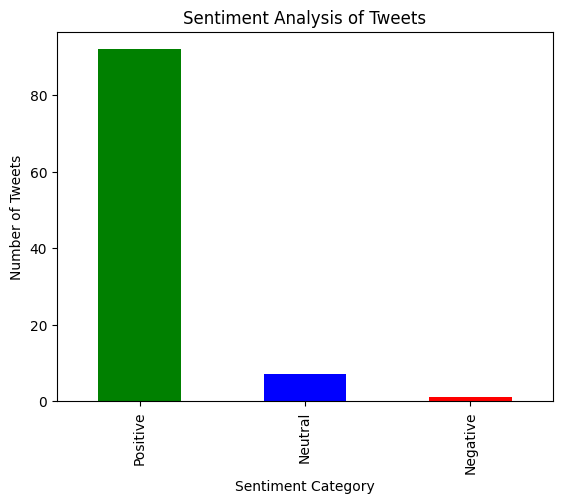

In [9]:
import matplotlib.pyplot as plt

# Plot the sentiment counts
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.show()

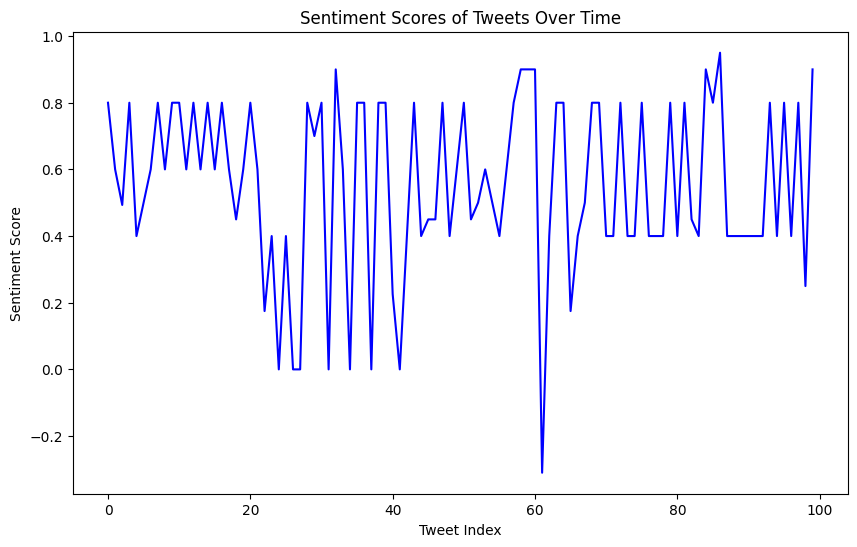

In [10]:
# Plot the sentiment scores
plt.figure(figsize=(10, 6))
tweets_df['Sentiment'].plot(kind='line', color='blue')
plt.title('Sentiment Scores of Tweets Over Time')
plt.xlabel('Tweet Index')
plt.ylabel('Sentiment Score')
plt.show()

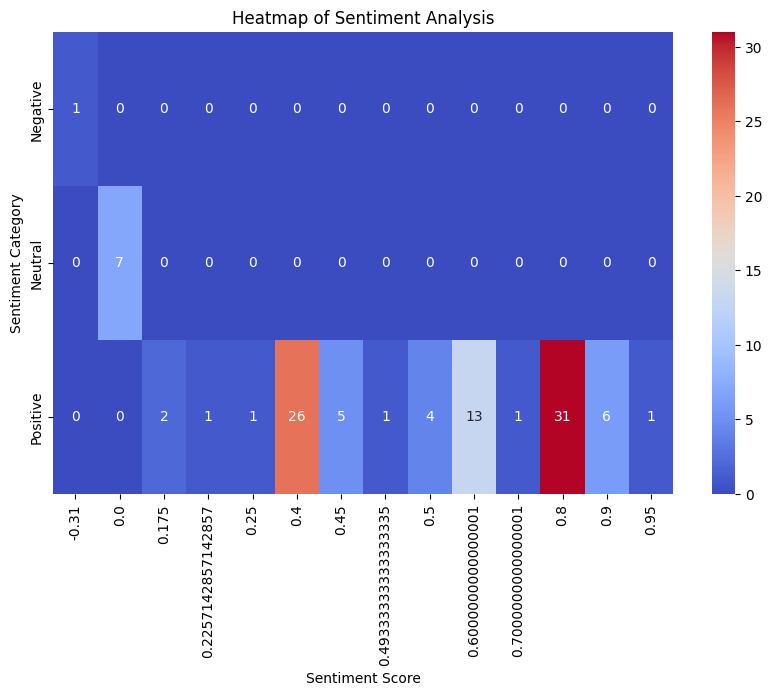

In [12]:
import seaborn as sns

# Create a pivot table for the heatmap
heatmap_data = tweets_df.pivot_table(index='Sentiment Category', columns='Sentiment', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Sentiment Analysis')
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment Category')
plt.show()